# Project Introduction

## **Project Title: Forecasting Bitcoin Prices Using ARIMA Model**

### **Introduction:**

Bitcoin, the pioneering cryptocurrency, has seen exponential growth and volatility since its inception. As a decentralized digital asset, it is highly sensitive to market dynamics, making its price prediction both challenging and critical. Accurate forecasting of Bitcoin prices holds immense value for investors, traders, and market analysts who seek to make informed decisions and strategize effectively.

### **Background:**

#### **1. Bitcoin Price Dynamics:**

Bitcoin prices are influenced by a myriad of factors including market sentiment, regulatory news, technological advancements, and macroeconomic trends. The inherent volatility of Bitcoin, characterized by rapid price swings and unpredictable market movements, necessitates sophisticated forecasting methods to anticipate future price trends.

#### **2. Time Series Forecasting:**

Time series forecasting is a statistical technique used to predict future values based on historical data. It leverages patterns observed in past data to make predictions about future outcomes. In the context of Bitcoin prices, time series models aim to capture underlying trends and seasonality to provide accurate forecasts.

#### **3. ARIMA Model:**

The ARIMA (AutoRegressive Integrated Moving Average) model is a widely used time series forecasting method that combines three components:
- **AutoRegressive (AR)**: Captures the relationship between a variable and its lagged values.
- **Integrated (I)**: Differentiates the data to make it stationary, i.e., having constant mean and variance over time.
- **Moving Average (MA)**: Models the relationship between a variable and the residual errors from previous periods.

ARIMA models are particularly suited for data with temporal dependencies and can be tuned to fit various time series patterns. This model requires careful selection of parameters (p, d, q) to optimize performance and accuracy.

### **Objective:**

The primary objective of this project is to develop a robust forecasting model for predicting Bitcoin's closing prices using historical price data from 2014 to 2024. By applying the ARIMA model, this project aims to:
- Forecast future Bitcoin prices based on past trends.
- Assess the accuracy of the ARIMA model in predicting Bitcoin price movements.
- Provide insights into the effectiveness of the ARIMA model and identify areas for potential improvement.

### **Dataset:**

The dataset utilized in this analysis comprises daily Bitcoin price data from January 2014 to January 2024, featuring the following columns:
- **Date**: The date of the recorded price.
- **Open**: The opening price of Bitcoin on the respective date.
- **High**: The highest price of Bitcoin on the respective date.
- **Low**: The lowest price of Bitcoin on the respective date.
- **Close**: The closing price of Bitcoin on the respective date.
- **Adj Close**: The adjusted closing price, accounting for corporate actions like stock splits.
- **Volume**: The trading volume of Bitcoin on the respective date.

**Dataset Link:**
[Bitcoin Prices Dataset (BTC-USD) (2014-2024)](https://github.com/Kofoworola13/DSS/raw/main/datasets/BTC-USD%20(2014-2024).csv)

**Approach:**

1. **Data Preprocessing:**
   - Load and explore the dataset.
   - Convert the `Date` column to datetime format and set it as the index.
   - Plot the historical `Close` prices to understand trends and seasonality.

2. **Model Building:**
   - Split the dataset into training and testing sets.
   - Build an ARIMA model to forecast future `Close` prices using the training data.
   - Determine the optimal ARIMA parameters (p, d, q) through techniques such as ACF and PACF plots.

3. **Evaluation:**
   - Forecast future Bitcoin prices and compare them against actual `Close` prices from the testing set.
   - Visualize the forecasted `Close` prices alongside actual prices.
   - Assess the model's accuracy using the Mean Absolute Percentage Error (MAPE) metric.

4. **Conclusion:**
   - Evaluate the effectiveness of the ARIMA model in predicting Bitcoin prices.
   - Discuss insights gained from the forecasting results and potential improvements for future models.



This notebook is my solution to the [Microsoft ML for Beginners course on ARIMA](https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/2-ARIMA/assignment.md).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error

# Load and Explore the Data

In [2]:
# Load the dataset
url = 'https://github.com/Kofoworola13/DSS/raw/main/datasets/BTC-USD%20(2014-2024).csv'
btc_df = pd.read_csv(url)

In [3]:
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [4]:
btc_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN
3412,2024-01-21,41671.488281,41693.160156,41615.140625,41623.695313,41623.695313,1.127404e+10


In [5]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


In [6]:
btc_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
std,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
btc_df.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


**Data Imputation Detail**

The dataset looks like well-prepared except for a few missing values in the `Open`, `High`, `Low`, `Close`, `Adj Close` and `Volume` columns on the 3412nd row.

I will be imputing the missing values with historical data from [Yahoo Finance](https://finance.yahoo.com/quote/BTC-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAIW3nkXSoSM9p_ACEe3NcCfbUiBayiKZv3MgwsrryJJbQAQ8M1Iky1EUuNyHGTsKjOlvIUHI2SJnGZJhMJM7iYxVLo-K4ZKyk71ABIR7eTLXSvt3evVQ7b3VHSbeolNjMzcp7SbYne1RhFRbs7KPqi4Y_kZlRNQdeAjRuhzLWVFM), so I can ensure the dataset remains accurate and complete for modeling. Since only one row is missing, I will manually enter the missing values.

In [8]:
# Convert 'Date' column to datetime format for time series analysis
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

# Set 'Date' as the index
btc_df.set_index('Date', inplace=True)

# Assign a daily frequency explicitly
btc_df = btc_df.asfreq('D')

In [9]:
# Manually entering missing values
btc_df.loc['2024-01-20'] = [41624.59,   # missing_open_value
                            41877.59,   # missing_high_value
                            41446.82,   # missing_low_value
                            41665.59,   # missing_close_value
                            41665.59,   # missing_adj_close_value
                            11586690904]  # missing_volume_value

In [10]:
btc_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# Visualizing the time series of the closing prices of BTC

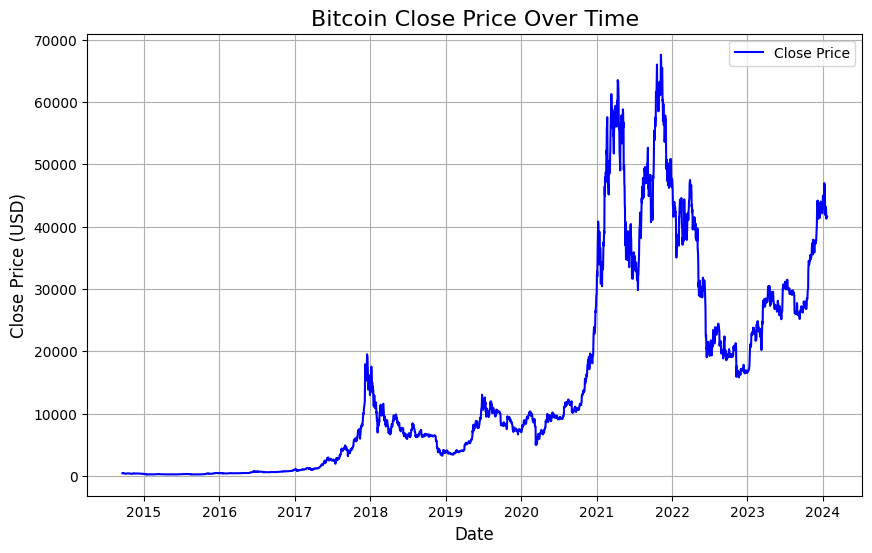

In [11]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(btc_df.index, btc_df['Close'], color='blue', label='Close Price')
plt.title('Bitcoin Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Key Observations from the Bitcoin Close Price Time Series Plot:**

* **Upward Trend:** The overall trend is upward, indicating a general increase in Bitcoin's price over the period.
* **Volatility:** The price exhibits high volatility, with significant fluctuations both up and down.
* **Bull Runs and Bear Markets:** The chart shows periods of rapid price increases (bull markets) followed by sharp declines (bear markets).
* **No Clear Seasonality:** There doesn't seem to be a strong seasonal pattern in the data, suggesting that factors other than seasonal variations are driving price movements.
* **Outliers:** A few extreme price spikes and dips are visible, which could be attributed to specific news events or market sentiment shifts.

**Additional Insights:**

* **Market Sentiment:** The price fluctuations likely reflect changes in investor sentiment and market dynamics.
* **External Factors:** News events, regulatory changes, and macroeconomic conditions can also influence Bitcoin's price.


Overall, the Bitcoin price time series demonstrates a volatile market with a strong upward trend, influenced by various factors such as market sentiment, news events, and technical analysis. These observations help set the foundation for applying time series models such as ARIMA by providing insights into the overall behavior and characteristics of the data.



# Model Building with Unscaled data

**General Step:**

1. Split the dataset
2. Define the model
3. Fit the model
4. Determine the optimal ARIMA parameters

## Splitting the dataset

The dataset was split into training and testing sets to evaluate the performance of the ARIMA model. The first 80% of the data was allocated to the training set, while the remaining 20% was reserved for testing.

- **Training Set (80%):** The initial portion of the dataset is used to train the ARIMA model, allowing the model to capture underlying patterns and trends in Bitcoin prices over time.
- **Testing Set (20%):** The latter portion is set aside to evaluate how well the trained model can forecast future price movements.

By using this time-based split, the model is trained on earlier data and tested on more recent data, which is a common approach in time series forecasting to ensure that the model is evaluated on unseen data.

In [12]:
# Determine the split index (80% for training)
split_index = int(len(btc_df) * 0.8)

# Split the dataset
train = btc_df.iloc[:split_index]  # First 80% for training
test = btc_df.iloc[split_index:]   # Remaining 20% for testing

# Check the size of the train and test sets
print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

Training set size: 2730
Test set size: 683


In [13]:
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [14]:
train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,1.697592e+10
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,1.974523e+10
2022-03-07,38429.304688,39430.226563,37260.203125,38062.039063,38062.039063,2.854614e+10
2022-03-08,38059.902344,39304.441406,37957.386719,38737.269531,38737.269531,2.577658e+10
2022-03-09,38742.816406,42465.671875,38706.093750,41982.925781,41982.925781,3.228412e+10


In [15]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-10,41974.070313,42004.726563,38832.941406,39437.460938,39437.460938,3.107806e+10
2022-03-11,39439.968750,40081.679688,38347.433594,38794.972656,38794.972656,2.636489e+10
2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,38904.011719,1.461645e+10
2022-03-13,38884.726563,39209.351563,37728.144531,37849.664063,37849.664063,1.730075e+10
2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,2.432216e+10


In [16]:
test.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,42742.652344,2.085123e+10
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,2.521836e+10
2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,2.575241e+10
2024-01-20,41624.590000,41877.590000,41446.820000,41665.590000,41665.590000,1.158669e+10
2024-01-21,41671.488281,41693.160156,41615.140625,41623.695313,41623.695313,1.127404e+10


## Build and fit the ARIMA model

### Determining the optimal ARIMA values

Determining the optimal ARIMA values (**p**, **d**, **q**) is essential for creating an effective forecasting model. Accurate selection of these parameters ensures that the model correctly captures data patterns and trends, leading to more reliable predictions. Incorrect values can result in poor performance and inaccurate forecasts, making precise parameter tuning crucial for optimal model effectiveness.

Here’s a step-by-step process:

### 1. **Understand the Parameters**:
- **p** (AR term): The number of lag observations included in the model (Autoregressive part).
- **d** (Differencing): The number of times the data needs to be differenced to make it stationary.
- **q** (MA term): The number of lagged forecast errors in the model (Moving Average part).



#### 2. **Check for Stationarity**:
Stationarity means that the statistical properties (mean, variance) of the series do not change over time. ARIMA requires the data to be stationary, so you need to check whether the time series is stationary.

- **Use the Augmented Dickey-Fuller (ADF) test** to check for stationarity:

  - If the p-value is less than 0.05, the data is stationary.
  - If not, you'll need to difference the data (`d` parameter).

In [17]:
result = adfuller(btc_df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")

ADF Statistic: -1.3291150545010295
p-value: 0.6157491405859167
The data is non-stationary.


Since the data is non-stationary, I will proceed to determine `d` (differencing order) in the next step.

#### 3. **Determine `d` (Differencing Order)**:
If your data is non-stationary (p-value > 0.05 from the ADF test), apply differencing until the data becomes stationary.


In [18]:
# 1. First difference the data
data_diff = btc_df['Close'].diff().dropna()

# 2. Check for stationarity after differencing
result_diff = adfuller(data_diff)
print('ADF Statistic (After Differencing):', result_diff[0])
print('p-value (After Differencing):', result_diff[1])

if result_diff[1] <= 0.05:
    print("The data is now stationary after differencing.")
else:
    print("The data is still non-stationary after differencing.")

ADF Statistic (After Differencing): -8.965566524466631
p-value (After Differencing): 8.006798612344029e-15
The data is now stationary after differencing.


**Determing the `d` value**

The `d` value represents the number of times the data was differenced to make it stationary. Since I differenced the data once and got a stationary result, I will set:

`d = 1`


Moving on to step 4.

#### 4. **Use Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots** to Choose `p` and `q`:
Once you have a stationary series (after differencing if needed), you can use **ACF** and **PACF** plots to help determine the values for `p` and `q`.

- **ACF (Autocorrelation Function)** Plot: Helps identify the `q` parameter.
- **PACF (Partial Autocorrelation Function)** Plot: Helps identify the `p` parameter.

**How to Interpret the Plots:**
- **ACF Plot:** The lag at which the plot cuts off or drops below the significance level gives the value of `q`.
- **PACF Plot:** The lag at which the PACF plot cuts off gives the value of `p`.


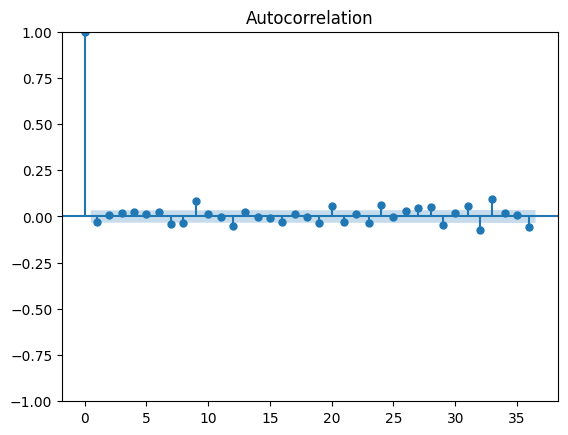

In [19]:
# Plot ACF
plot_acf(data_diff)
plt.show()

This autocorrelation plot is a visual representation of the correlation between a variable at different time points within a time series.

**Key Observations:**

* **Significant Lag 1:** The first lag (lag 1) has a significant positive autocorrelation, indicating that the current value of the series is strongly correlated with the previous value.
* **No Significant Lags Beyond 1:** The autocorrelation coefficients for lags greater than 1 are not significantly different from zero, suggesting that the relationship between the current value and past values is primarily explained by the immediate past value.
* **Decaying Coefficients:** The autocorrelation coefficients gradually decrease as the lag increases, indicating a relatively short-term dependence between the current value and past values.

**Interpretation:**

Based on these observations, the time series data appears to be **AR(1)**, which means it can be modeled using an AutoRegressive process of order 1. This indicates that the current value of the series is primarily influenced by its immediate past value.



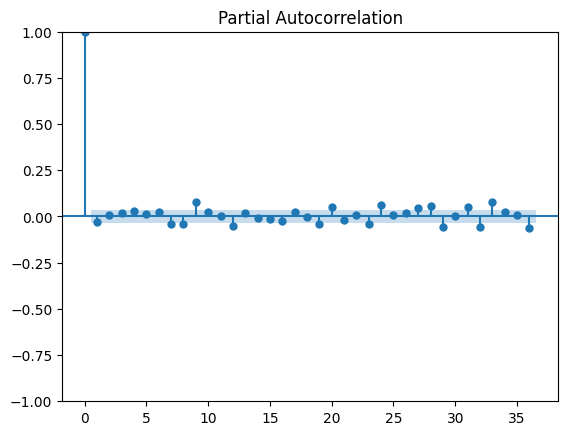

In [20]:
# Plot PACF
plot_pacf(data_diff)
plt.show()

This partial autocorrelation plot (PACF) is a visual representation of PACF, a tool used in time series analysis to measure the correlation between a variable at a specific time point and its lagged values, controlling for the effects of intervening lags.

**Key Observations:**

* **Significant Lag:** The first lag (lag 1) has a significant positive autocorrelation, indicating that the current value of the series is strongly correlated with the previous value.
* **No Significant Lags Beyond 1:** The PACF coefficients for lags greater than 1 are not significantly different from zero, suggesting that the relationship between the current value and past values is primarily explained by the immediate past value.
* **Decaying Coefficients:** The PACF coefficients gradually decrease as the lag increases, indicating a relatively short-term dependence between the current value and past values.

**Interpretation:**

Based on these observations, the time series data appears to be **AR(1)**, which means it can be modeled using an AutoRegressive process of order 1. This indicates that the current value of the series is primarily influenced by its immediate past value.




**Choosing the values**

Based on the plots above, the time series data has been indentified as AR(1) Model which translates to `p=1 and q=0` values.

#### Building the ARIMA model

In [21]:
# Defining the ARIMA model
order = (1, 1, 0)  # ARIMA order (p, d, q)

model = ARIMA(train['Close'], order=order)

# Fit the ARIMA model
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2730
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -22069.368
Date:                Sat, 14 Sep 2024   AIC                          44142.736
Time:                        00:37:57   BIC                          44154.560
Sample:                    09-18-2014   HQIC                         44147.010
                         - 03-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0183      0.010     -1.917      0.055      -0.037       0.000
sigma2      6.194e+05   5190.387    119.329      0.000    6.09e+05     6.3e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

# Evaluation

In [22]:
# Forecast
forecast = fitted_model.forecast(steps=len(test))
print(forecast.head())

2022-03-10    41923.423544
2022-03-11    41924.514392
2022-03-12    41924.494393
2022-03-13    41924.494760
2022-03-14    41924.494753
Freq: D, Name: predicted_mean, dtype: float64


In [23]:
forecast_dates = pd.date_range(start=test.index[0], periods=len(forecast), freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)
forecast_df.head()

,Forecast
2022-03-10,41923.423544
2022-03-11,41924.514392
2022-03-12,41924.494393
2022-03-13,41924.494760
2022-03-14,41924.494753


In [24]:
# Calculate MAPE
mape = mean_absolute_percentage_error(test['Close'], forecast_df['Forecast'])
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 64.26%


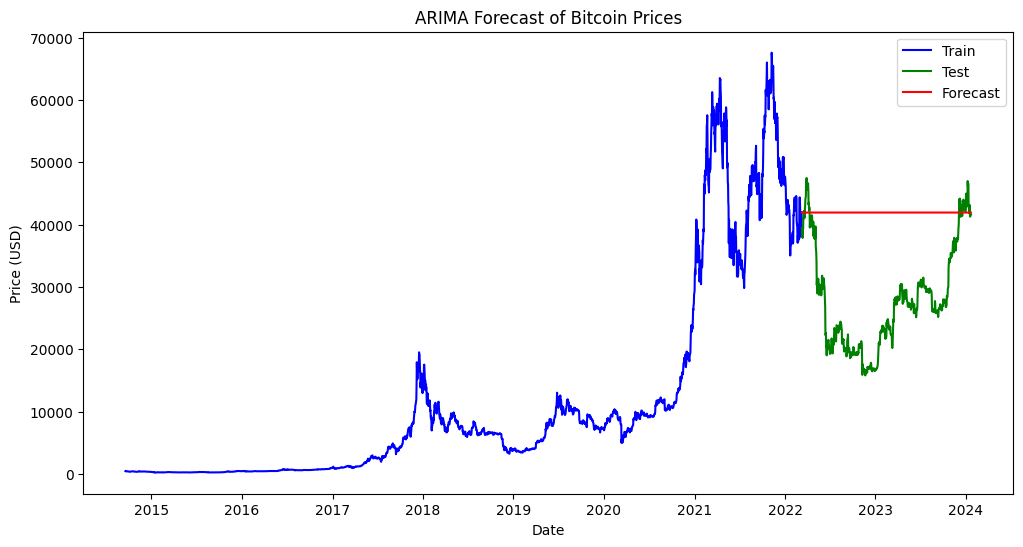

In [25]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('ARIMA Forecast of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

**Key Observations:**

* **Model Fit:** The ARIMA model appears to fit the historical data reasonably well, capturing the overall trend and some of the volatility.
* **Forecast Accuracy:** The forecast line deviates from the actual test data, indicating some level of error in the model's predictions.
* **Short-Term Accuracy:** The model may have better accuracy for short-term forecasts compared to long-term forecasts, as time series models often struggle to predict distant future values.
* **Volatility:** Bitcoin prices are highly volatile, which can make accurate forecasting challenging.

**Additional Considerations:**

* **Model Selection:** The choice of ARIMA parameters (p, d, q) is crucial for the model's accuracy.
* **External Factors:** Factors such as news events, regulatory changes, and market sentiment can influence Bitcoin prices and may not be fully captured by the ARIMA model.

Overall, the ARIMA model provides a reasonable forecast of Bitcoin prices, but it's important to consider the limitations of time series forecasting and the inherent volatility of cryptocurrency markets.



# Model Building with Log Transformed Data

In [26]:
# Apply log transformation
btc_df['Log_Close'] = np.log(btc_df['Close'])

In [27]:
# Split the transformed data
train_log = btc_df['Log_Close'][:'2022-03-09']
test_log = btc_df['Log_Close']['2022-03-10':]

In [28]:
# Fit ARIMA model on log-transformed data
model_log = ARIMA(train_log, order=order)
fitted_model_log = model_log.fit()

print(fitted_model_log.summary())

                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 2730
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4964.991
Date:                Sat, 14 Sep 2024   AIC                          -9925.983
Time:                        00:37:59   BIC                          -9914.159
Sample:                    09-18-2014   HQIC                         -9921.709
                         - 03-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0179      0.012     -1.474      0.140      -0.042       0.006
sigma2         0.0015   1.64e-05     93.667      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [29]:
# Forecast log-transformed values
forecast_log = fitted_model_log.forecast(steps=len(test_log))

# Convert forecast back to original scale
forecast = np.exp(forecast_log)

In [30]:
# Create forecast dates index
forecast_dates = pd.date_range(start=test_log.index[0], periods=len(forecast), freq='D')

# Create DataFrame for forecast
forecast_df_log = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)

In [31]:
# Ensure test_log and forecast_df_log have the same index
test_actual = np.exp(test_log)  # Convert test_log back to original scale
mape = mean_absolute_percentage_error(test_actual, forecast_df_log['Forecast'])

print(f'MAPE: {mape * 100:.2f}%')

MAPE: 64.26%


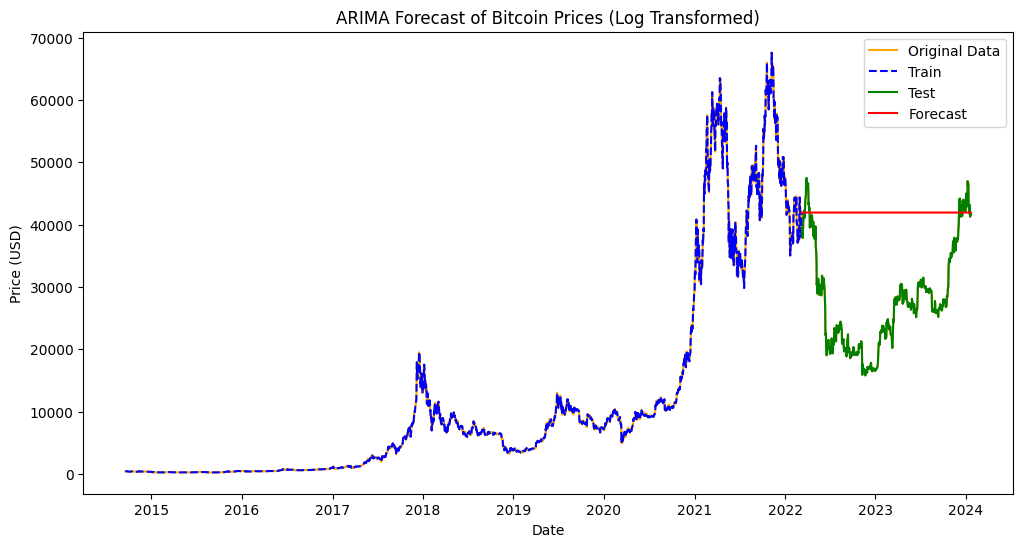

In [32]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(btc_df.index, btc_df['Close'], label='Original Data', color='orange')
plt.plot(train_log.index, np.exp(train_log), label='Train', color='blue', linestyle='--')
plt.plot(test_log.index, np.exp(test_log), label='Test', color='green')
plt.plot(forecast_df_log.index, forecast_df_log['Forecast'], label='Forecast', color='red')
plt.title('ARIMA Forecast of Bitcoin Prices (Log Transformed)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Project Conclusion

The analysis of Bitcoin price forecasting using the SARIMAX model yielded the following results:

#### Raw Data:
- **Model:** ARIMA(1, 1, 0)
- **MAPE:** 64.26%
- **Key Findings:** The SARIMAX model applied to the raw data resulted in a high Mean Absolute Percentage Error (MAPE) of 64.26%. This indicates that the model's forecasts deviated significantly from the actual Bitcoin prices.

#### Log-Transformed Data:
- **Model:** ARIMA(1, 1, 0)
- **MAPE:** 64.26%
- **Key Findings:** The MAPE for the log-transformed data was also 64.26%. This suggests that while the log transformation improved some aspects of the model, the overall forecasting accuracy remained the same.

#### Areas for Improvement:
- **Model Refinement:**
  - **Feature Engineering:** Introducing additional relevant features, such as trading volume or market sentiment, could enhance the model's ability to capture complex patterns.
  - **Model Selection:** Exploring other models, such as more advanced variants of ARIMA, machine learning approaches, or hybrid models, might improve accuracy.

- **Data Transformations:**
  - While log transformation was attempted, other transformations (e.g., Box-Cox transformation) and differencing techniques should be explored to better handle non-stationarity and variance issues.

- **Parameter Tuning:**
  - Systematic tuning of model parameters, including order of AR, differencing, and MA components, might yield better forecasting results.

- **Error Analysis:**
  - A detailed analysis of residuals and potential sources of error could provide insights into why the model's performance did not improve with transformations.

Overall, while the SARIMAX model provides a foundational approach to forecasting Bitcoin prices, further refinement and exploration of alternative methods are necessary to achieve better predictive accuracy. For now, I will stop here with the assignment objectives, but I plan to further explore these areas for improvement in the future to enhance the model's performance.
